# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [15]:
# Your code here
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st 
import numpy as np

In [16]:
boston_df = pd.read_csv("../data/boston_data.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [17]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [18]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [19]:
#check nulls 
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [20]:
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
#Detect and exclude outliers in a pandas DataFrame
#Z-score (or standard score) represents how many standard deviations a given measurement deviates from the mean. In other words it merely re-scales, or standardizes, your data.

z= np.abs(st.zscore(boston_df))
print(z.shape)
boston_z=boston_df[(z<3).all(axis=1)]
print(boston_z.shape)

(404, 14)
(321, 14)


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [21]:
#lets see the correlation of all variables 
corr= boston_z.corr()
corr.style.background_gradient(cmap="coolwarm")


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.245049,0.523523,nan,0.562803,-0.199660,0.436390,-0.485358,0.811224,0.749920,0.344787,-0.327797,0.563541,-0.504009
zn,-0.245049,1.000000,-0.467428,nan,-0.444377,0.295135,-0.453536,0.559321,-0.245867,-0.265426,-0.350184,0.148885,-0.365562,0.342641
indus,0.523523,-0.467428,1.000000,nan,0.721443,-0.362448,0.562405,-0.659449,0.569357,0.705728,0.327299,-0.324725,0.613879,-0.565210
chas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nox,0.562803,-0.444377,0.721443,nan,1.000000,-0.274451,0.705628,-0.762902,0.581103,0.642956,0.119749,-0.349625,0.589708,-0.467456
rm,-0.199660,0.295135,-0.362448,nan,-0.274451,1.000000,-0.194372,0.190069,-0.111475,-0.206632,-0.232715,0.107586,-0.613583,0.712762
age,0.436390,-0.453536,0.562405,nan,0.705628,-0.194372,1.000000,-0.695878,0.402581,0.466754,0.195327,-0.234018,0.605873,-0.454210
dis,-0.485358,0.559321,-0.659449,nan,-0.762902,0.190069,-0.695878,1.000000,-0.454150,-0.518759,-0.182534,0.265998,-0.495526,0.314168
rad,0.811224,-0.245867,0.569357,nan,0.581103,-0.111475,0.402581,-0.454150,1.000000,0.902493,0.424147,-0.321713,0.456052,-0.425741
tax,0.749920,-0.265426,0.705728,nan,0.642956,-0.206632,0.466754,-0.518759,0.902493,1.000000,0.422950,-0.340601,0.529352,-0.535400


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [22]:
# Your response here
#high correlation between tax and rad
#there is also highly negative correlation between other variables like dis, indus nox and age.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [23]:
# Your response here
# I droped the rad and chas variable 
# chas varibale due to the nan 
# rad variable due to the high corelation between rad and tax and kept the tax variable 

corr2= boston_z[["crim","zn","nox","rm","age","dis","tax","ptratio","black","lstat", "medv"]].corr()
corr2.style.background_gradient(cmap="coolwarm")

,crim,zn,nox,rm,age,dis,tax,ptratio,black,lstat,medv
crim,1.000000,-0.245049,0.562803,-0.199660,0.436390,-0.485358,0.749920,0.344787,-0.327797,0.563541,-0.504009
zn,-0.245049,1.000000,-0.444377,0.295135,-0.453536,0.559321,-0.265426,-0.350184,0.148885,-0.365562,0.342641
nox,0.562803,-0.444377,1.000000,-0.274451,0.705628,-0.762902,0.642956,0.119749,-0.349625,0.589708,-0.467456
rm,-0.199660,0.295135,-0.274451,1.000000,-0.194372,0.190069,-0.206632,-0.232715,0.107586,-0.613583,0.712762
age,0.436390,-0.453536,0.705628,-0.194372,1.000000,-0.695878,0.466754,0.195327,-0.234018,0.605873,-0.454210
dis,-0.485358,0.559321,-0.762902,0.190069,-0.695878,1.000000,-0.518759,-0.182534,0.265998,-0.495526,0.314168
tax,0.749920,-0.265426,0.642956,-0.206632,0.466754,-0.518759,1.000000,0.422950,-0.340601,0.529352,-0.535400
ptratio,0.344787,-0.350184,0.119749,-0.232715,0.195327,-0.182534,0.422950,1.000000,-0.080837,0.290615,-0.471788
black,-0.327797,0.148885,-0.349625,0.107586,-0.234018,0.265998,-0.340601,-0.080837,1.000000,-0.307701,0.282290
lstat,0.563541,-0.365562,0.589708,-0.613583,0.605873,-0.495526,0.529352,0.290615,-0.307701,1.000000,-0.754075


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [24]:
# Your code here
#medv is the target -> house pricing 
boston_z["medv"].describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [25]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here: 
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [26]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston_z.drop(labels="medv", axis=1)
Y = boston_z["medv"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.25, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
from sklearn.ensemble import RandomForestRegressor

depths = [2, 4, 6, 8, 10]

train_scores = []
test_scores = []

for i in depths:
    # initialize model
    RFR = RandomForestRegressor(max_depth=i)
    # fit
    RFR.fit(X_train, Y_train)
    # predict test
    y_pred_test = RFR.predict(X_test)
    # predict train
    y_pred_train = RFR.predict(X_train)
    
    # get scores
    test_score = performance_metric(Y_test, y_pred_test)
    train_score = performance_metric(Y_train, y_pred_train)
    
    train_scores += [train_score]
    test_scores += [test_score]


Now, plot the score for each tree on the training set and on the testing set.

In [35]:
print(depths)
print(test_scores)
print(train_scores)


[2, 4, 6, 8, 10]
[0.6629766005197151, 0.7614917229970312, 0.7735192498777465, 0.7801716453866652, 0.783039575674259]
[0.8010148703230447, 0.9274454672795971, 0.9599170337757328, 0.9637409988414001, 0.9664564509942675]


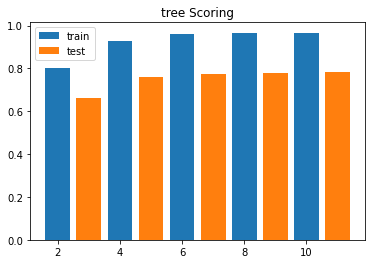

In [34]:
# plot train scores

plt.bar(x=depths, height=train_scores, label="train")
plt.bar(x=[d+1 for d in depths], height=test_scores, label='test')
plt.title("tree Scoring")
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [30]:
# Your response here
# I can see that this model represents well the train data 
# But also it represents well the traing data with the r2score as a metric 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [31]:
# Your response here
# the model has a score that ranges from [0.80 to 0.97] in training and when it is applied in the test data it ranges from [.67 to .79] with the max dept of 10
# the model is underpredicting the target in aprox 0.21 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [32]:
# Your response here
#in my opinion the best guess optimal model , regarding the performance would be of a depth ranging from [2 to 4]
# since the results of the below values are the following  
#  
#test->[0.6629766005197151, 0.7614917229970312]
#train->[0.8010148703230447, 0.9274454672795971]

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [36]:
# Your response here
from sklearn.datasets import load_boston
boston_features = load_boston()
print(boston_features.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (